<a href="https://colab.research.google.com/github/Jai-Kumar786/Innomatics_Data-Science-with-Advanced-GENAI-Internship-Nov-2025/blob/main/Tennis_Data_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprehensive Exploratory Data Analysis (EDA)
## Tennis Competitions and Rankings Dataset

This notebook performs detailed EDA on 6 datasets related to tennis competitions, competitors, and venues.

## 1. Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# Load all datasets
category_df = pd.read_csv('category_details.csv')
competitors_df = pd.read_csv('Competitors_Table.csv')
competitor_rankings_df = pd.read_csv('Competitor_Rankings_Table.csv')
competition_df = pd.read_csv('competition_details.csv')
complex_df = pd.read_csv('complex_details.csv')
venue_df = pd.read_csv('venue_details.csv')

print('All datasets loaded successfully!')
print(f'Category Dataset: {category_df.shape}')
print(f'Competitors Dataset: {competitors_df.shape}')
print(f'Competitor Rankings Dataset: {competitor_rankings_df.shape}')
print(f'Competition Dataset: {competition_df.shape}')
print(f'Complex Dataset: {complex_df.shape}')
print(f'Venue Dataset: {venue_df.shape}')

All datasets loaded successfully!
Category Dataset: (5871, 2)
Competitors Dataset: (1000, 5)
Competitor Rankings Dataset: (1000, 5)
Competition Dataset: (5871, 6)
Complex Dataset: (621, 2)
Venue Dataset: (3207, 7)


## 2. Category Details Dataset EDA

In [ ]:
print('='*60)
print('CATEGORY DETAILS DATASET')
print('='*60)
print(f'\nShape: {category_df.shape}')
print(f'\nFirst few rows:')
print(category_df.head(10))
print(f'\nData types:\n{category_df.dtypes}')
print(f'\nMissing values:\n{category_df.isnull().sum()}')
print(f'\nDuplicate rows: {category_df.duplicated().sum()}')

CATEGORY DETAILS DATASET

Shape: (5871, 2)

First few rows:
       category_id         category_name
0  sr:category:181            Hopman Cup
1    sr:category:3                   ATP
2   sr:category:72            Challenger
3    sr:category:6                   WTA
4   sr:category:76             Davis Cup
5   sr:category:74  Billie Jean King Cup
6    sr:category:3                   ATP
7    sr:category:3                   ATP
8    sr:category:6                   WTA
9    sr:category:6                   WTA

Data types:
category_id      object
category_name    object
dtype: object

Missing values:
category_id      0
category_name    0
dtype: int64

Duplicate rows: 5853


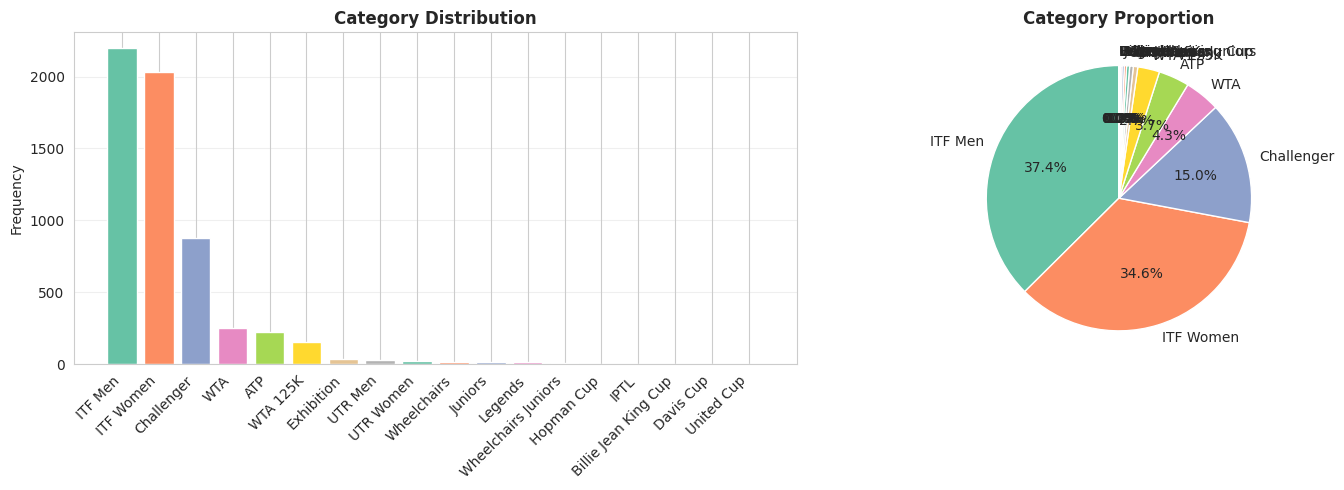


Category Summary Statistics:
category_name
ITF Men                 2198
ITF Women               2032
Challenger               878
WTA                      253
ATP                      220
WTA 125K                 156
Exhibition                32
UTR Men                   26
UTR Women                 22
Wheelchairs               16
Juniors                   16
Legends                   11
Wheelchairs Juniors        6
Hopman Cup                 1
IPTL                       1
Billie Jean King Cup       1
Davis Cup                  1
United Cup                 1
Name: count, dtype: int64

Total unique categories: 18
Total unique category names: 18


In [ ]:
# Category value counts and statistics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Category Name Distribution
category_counts = category_df['category_name'].value_counts()
colors = sns.color_palette('Set2', len(category_counts))
axes[0].bar(range(len(category_counts)), category_counts.values, color=colors)
axes[0].set_xticks(range(len(category_counts)))
axes[0].set_xticklabels(category_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Category Distribution', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Pie chart
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Category Proportion', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print('\nCategory Summary Statistics:')
print(category_counts)
print(f'\nTotal unique categories: {category_df["category_id"].nunique()}')
print(f'Total unique category names: {category_df["category_name"].nunique()}')

## 3. Competitors Dataset EDA

In [ ]:
print('='*60)
print('COMPETITORS DATASET')
print('='*60)
print(f'\nShape: {competitors_df.shape}')
print(f'\nFirst few rows:')
print(competitors_df.head(10))
print(f'\nData types:\n{competitors_df.dtypes}')
print(f'\nMissing values:\n{competitors_df.isnull().sum()}')
print(f'\nDuplicate rows: {competitors_df.duplicated().sum()}')

COMPETITORS DATASET

Shape: (1000, 5)

First few rows:
         competitor_id                       name      country country_code  \
0  sr:competitor:49363                Pavic, Mate      Croatia          HRV   
1  sr:competitor:51836  Arevalo-Gonzalez, Marcelo  El Salvador          SLV   
2  sr:competitor:87690           Thompson, Jordan    Australia          AUS   
3  sr:competitor:15568         Granollers, Marcel        Spain          ESP   
4  sr:competitor:16160          Zeballos, Horacio    Argentina          ARG   
5  sr:competitor:15310            Bolelli, Simone        Italy          ITA   
6  sr:competitor:95801          Vavassori, Andrea        Italy          ITA   
7  sr:competitor:16608             Mektic, Nikola      Croatia          HRV   
8  sr:competitor:36593            Krawietz, Kevin      Germany          DEU   
9  sr:competitor:52293                  Putz, Tim      Germany          DEU   

  abbreviation  
0          PAV  
1          ARE  
2          THO  
3      

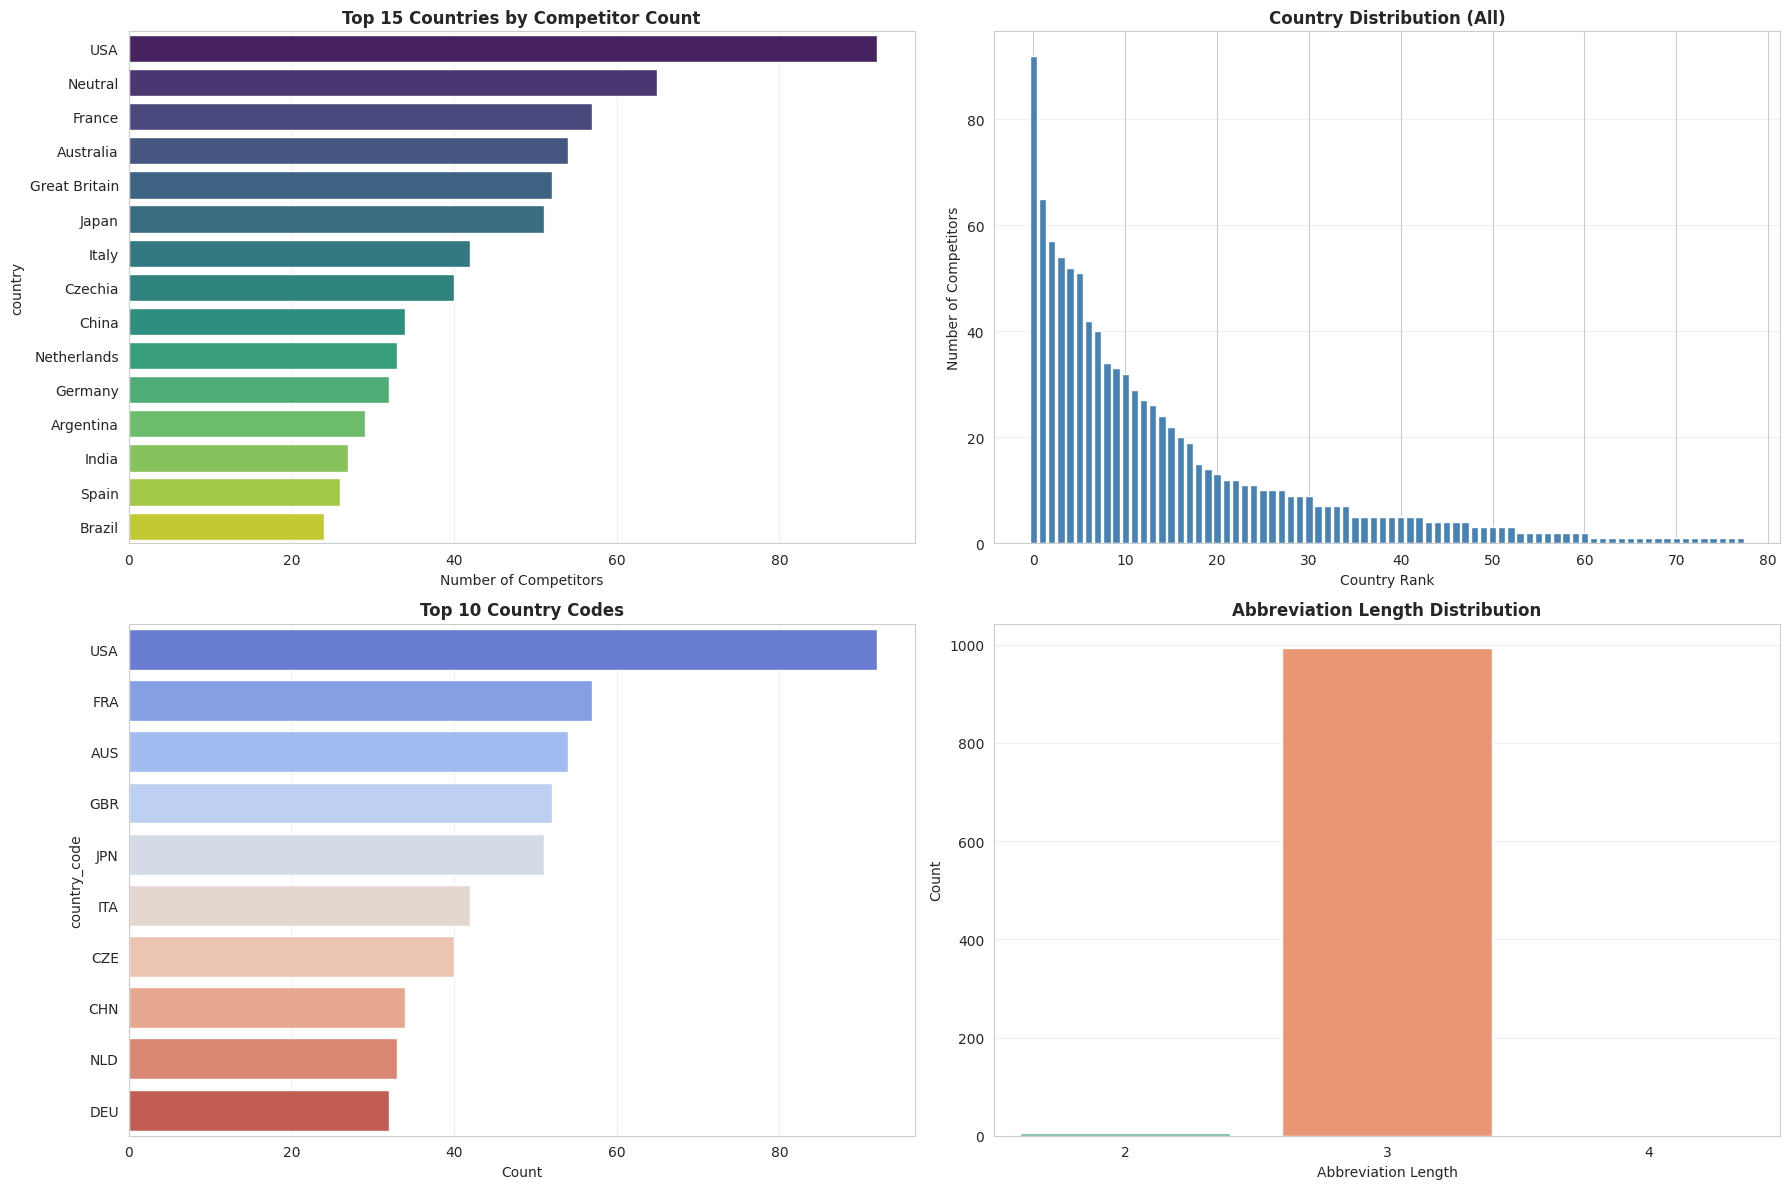


Competitors Summary Statistics:
Total competitors: 1000
Total unique countries: 78
Total unique country codes: 77

Top 10 Countries:
country
USA              92
Neutral          65
France           57
Australia        54
Great Britain    52
Japan            51
Italy            42
Czechia          40
China            34
Netherlands      33
Name: count, dtype: int64


In [ ]:
# Competitors country distribution
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Top 15 countries
top_countries = competitors_df['country'].value_counts().head(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Competitors')
axes[0, 0].set_title('Top 15 Countries by Competitor Count', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: All countries histogram
country_counts = competitors_df['country'].value_counts()
axes[0, 1].bar(range(len(country_counts)), sorted(country_counts.values, reverse=True), color='steelblue')
axes[0, 1].set_xlabel('Country Rank')
axes[0, 1].set_ylabel('Number of Competitors')
axes[0, 1].set_title('Country Distribution (All)', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Country code distribution
top_country_codes = competitors_df['country_code'].value_counts().head(10)
sns.barplot(x=top_country_codes.values, y=top_country_codes.index, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Top 10 Country Codes', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Abbreviation length
competitors_df['abbr_length'] = competitors_df['abbreviation'].str.len()
sns.countplot(data=competitors_df, x='abbr_length', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_xlabel('Abbreviation Length')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Abbreviation Length Distribution', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\nCompetitors Summary Statistics:')
print(f'Total competitors: {len(competitors_df)}')
print(f'Total unique countries: {competitors_df["country"].nunique()}')
print(f'Total unique country codes: {competitors_df["country_code"].nunique()}')
print(f'\nTop 10 Countries:')
print(competitors_df['country'].value_counts().head(10))

## 4. Competitor Rankings Dataset EDA

In [ ]:
print('='*60)
print('COMPETITOR RANKINGS DATASET')
print('='*60)
print(f'\nShape: {competitor_rankings_df.shape}')
print(f'\nFirst few rows:')
print(competitor_rankings_df.head(10))
print(f'\nData types:\n{competitor_rankings_df.dtypes}')
print(f'\nMissing values:\n{competitor_rankings_df.isnull().sum()}')
print(f'\nBasic Statistics:\n{competitor_rankings_df.describe()}')

COMPETITOR RANKINGS DATASET

Shape: (1000, 5)

First few rows:
   rank  movement  points  competitions_played        competitor_id
0     1         0    7350                   22  sr:competitor:49363
1     1         0    7350                   22  sr:competitor:51836
2     3         0    6565                   22  sr:competitor:87690
3     4         0    6350                   17  sr:competitor:15568
4     4         0    6350                   17  sr:competitor:16160
5     6         3    5990                   20  sr:competitor:15310
6     7         1    5990                   22  sr:competitor:95801
7     8        -2    5930                   24  sr:competitor:16608
8     9         1    5880                   20  sr:competitor:36593
9    10         1    5790                   19  sr:competitor:52293

Data types:
rank                    int64
movement                int64
points                  int64
competitions_played     int64
competitor_id          object
dtype: object

Missing val

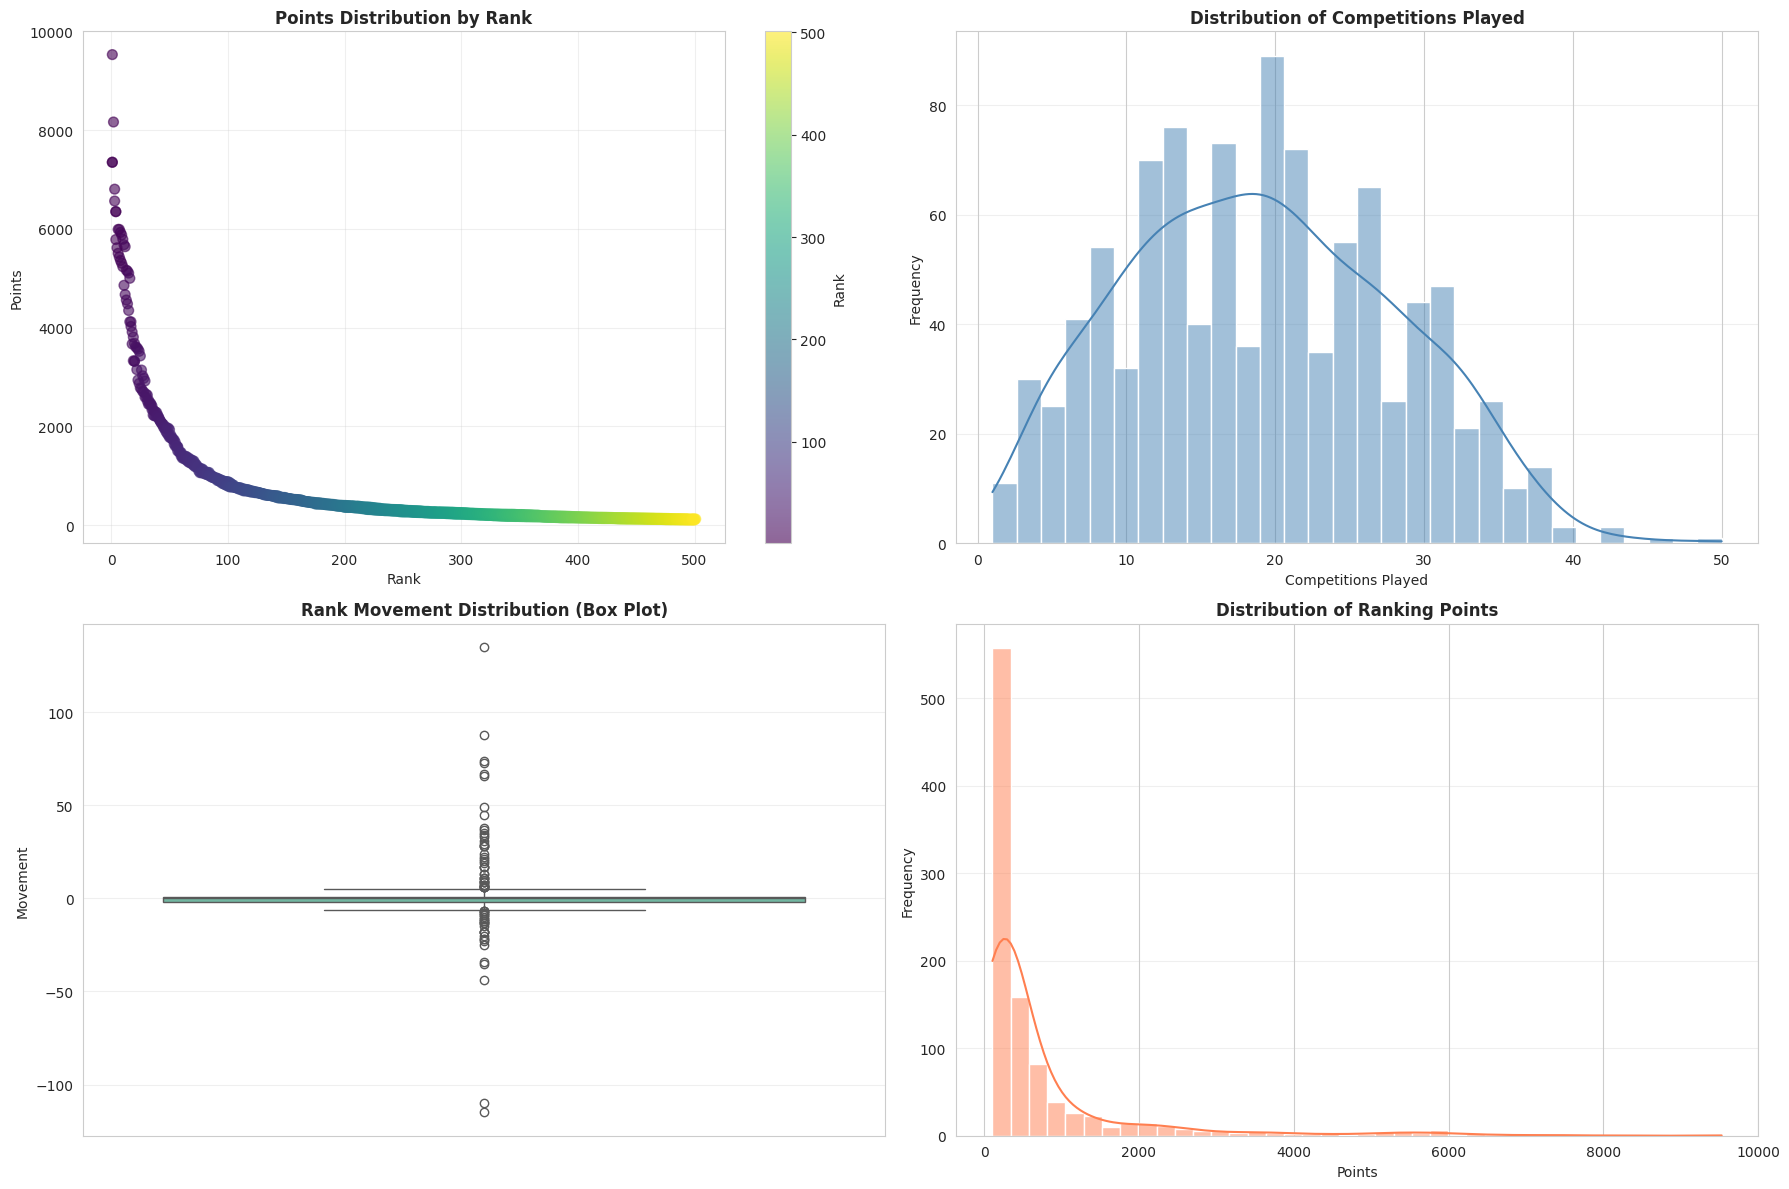


Rankings Summary Statistics:
Total rankings: 1000
Rank range: 1 - 501
Points range: 106 - 9530
Movement range: -115 - 135
Competitions played range: 1 - 50


In [ ]:
# Rankings visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Points vs Rank
scatter = axes[0, 0].scatter(competitor_rankings_df['rank'], competitor_rankings_df['points'],
                           c=competitor_rankings_df['rank'], cmap='viridis', alpha=0.6, s=50)
axes[0, 0].set_xlabel('Rank')
axes[0, 0].set_ylabel('Points')
axes[0, 0].set_title('Points Distribution by Rank', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 0], label='Rank')

# Plot 2: Competitions Played Distribution
sns.histplot(data=competitor_rankings_df, x='competitions_played', bins=30, kde=True,
             color='steelblue', ax=axes[0, 1])
axes[0, 1].set_xlabel('Competitions Played')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Competitions Played', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Movement Distribution
sns.boxplot(data=competitor_rankings_df, y='movement', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_ylabel('Movement')
axes[1, 0].set_title('Rank Movement Distribution (Box Plot)', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Points Distribution
sns.histplot(data=competitor_rankings_df, x='points', bins=40, kde=True,
             color='coral', ax=axes[1, 1])
axes[1, 1].set_xlabel('Points')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Ranking Points', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\nRankings Summary Statistics:')
print(f'Total rankings: {len(competitor_rankings_df)}')
print(f'Rank range: {competitor_rankings_df["rank"].min()} - {competitor_rankings_df["rank"].max()}')
print(f'Points range: {competitor_rankings_df["points"].min()} - {competitor_rankings_df["points"].max()}')
print(f'Movement range: {competitor_rankings_df["movement"].min()} - {competitor_rankings_df["movement"].max()}')
print(f'Competitions played range: {competitor_rankings_df["competitions_played"].min()} - {competitor_rankings_df["competitions_played"].max()}')

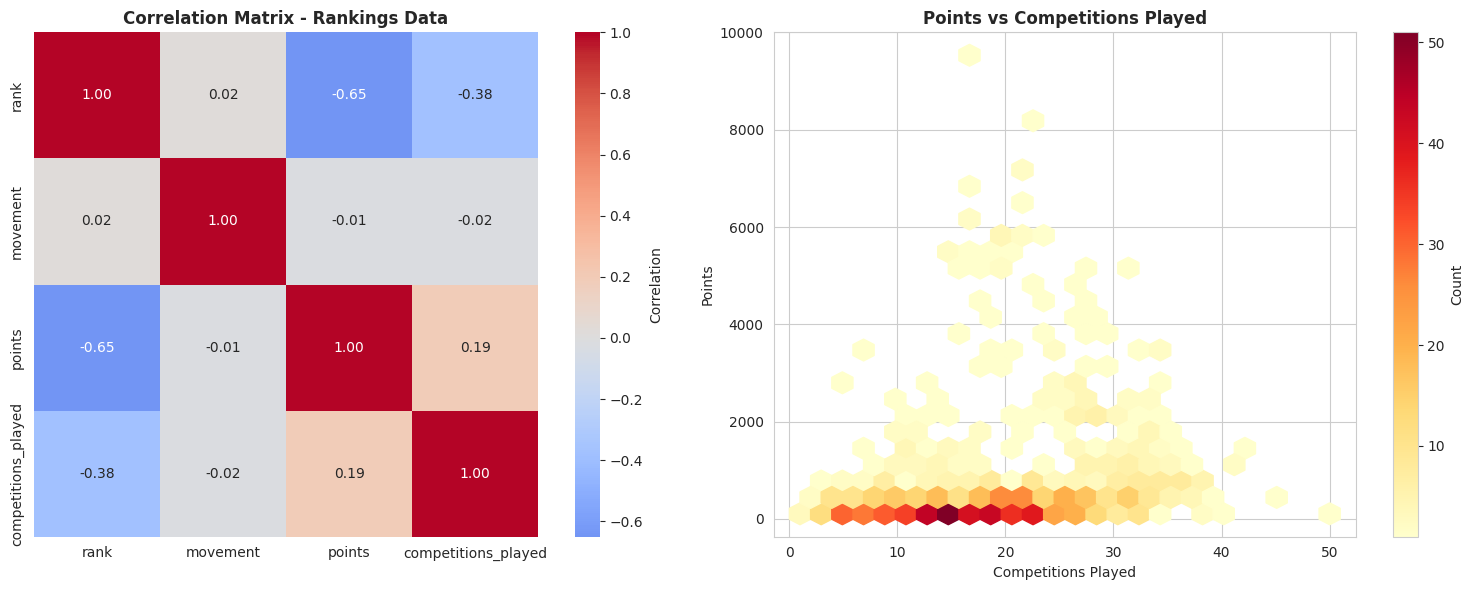


Correlation Analysis:
                         rank  movement    points  competitions_played
rank                 1.000000  0.020931 -0.650561            -0.379707
movement             0.020931  1.000000 -0.013613            -0.017245
points              -0.650561 -0.013613  1.000000             0.188274
competitions_played -0.379707 -0.017245  0.188274             1.000000


In [ ]:
# Advanced ranking correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Correlation matrix
ranking_numeric = competitor_rankings_df[['rank', 'movement', 'points', 'competitions_played']]
correlation_matrix = ranking_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlation Matrix - Rankings Data', fontsize=12, fontweight='bold')

# Plot 2: Points vs Competitions Played
hexbin = axes[1].hexbin(competitor_rankings_df['competitions_played'],
                       competitor_rankings_df['points'],
                       gridsize=25, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Competitions Played')
axes[1].set_ylabel('Points')
axes[1].set_title('Points vs Competitions Played', fontsize=12, fontweight='bold')
plt.colorbar(hexbin, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

print('\nCorrelation Analysis:')
print(correlation_matrix)

## 5. Competition Details Dataset EDA

In [ ]:
print('='*60)
print('COMPETITION DETAILS DATASET')
print('='*60)
print(f'\nShape: {competition_df.shape}')
print(f'\nFirst few rows:')
print(competition_df.head(10))
print(f'\nData types:\n{competition_df.dtypes}')
print(f'\nMissing values:\n{competition_df.isnull().sum()}')
print(f'\nBasic Info:')
competition_df.info()

COMPETITION DETAILS DATASET

Shape: (5871, 6)

First few rows:
        competition_id                   competition_name  \
0   sr:competition:620                         Hopman Cup   
1   sr:competition:660                     World Team Cup   
2   sr:competition:990         ATP Challenger Tour Finals   
3  sr:competition:1207  Championship International Series   
4  sr:competition:2100                          Davis Cup   
5  sr:competition:2102               Billie Jean King Cup   
6  sr:competition:2555              Wimbledon Men Singles   
7  sr:competition:2557              Wimbledon Men Doubles   
8  sr:competition:2559            Wimbledon Women Singles   
9  sr:competition:2561            Wimbledon Women Doubles   

             parent_id     type gender      category_id  
0                  NaN    mixed  mixed  sr:category:181  
1                  NaN    mixed    men    sr:category:3  
2  sr:competition:6239  singles    men   sr:category:72  
3                  NaN  singles  

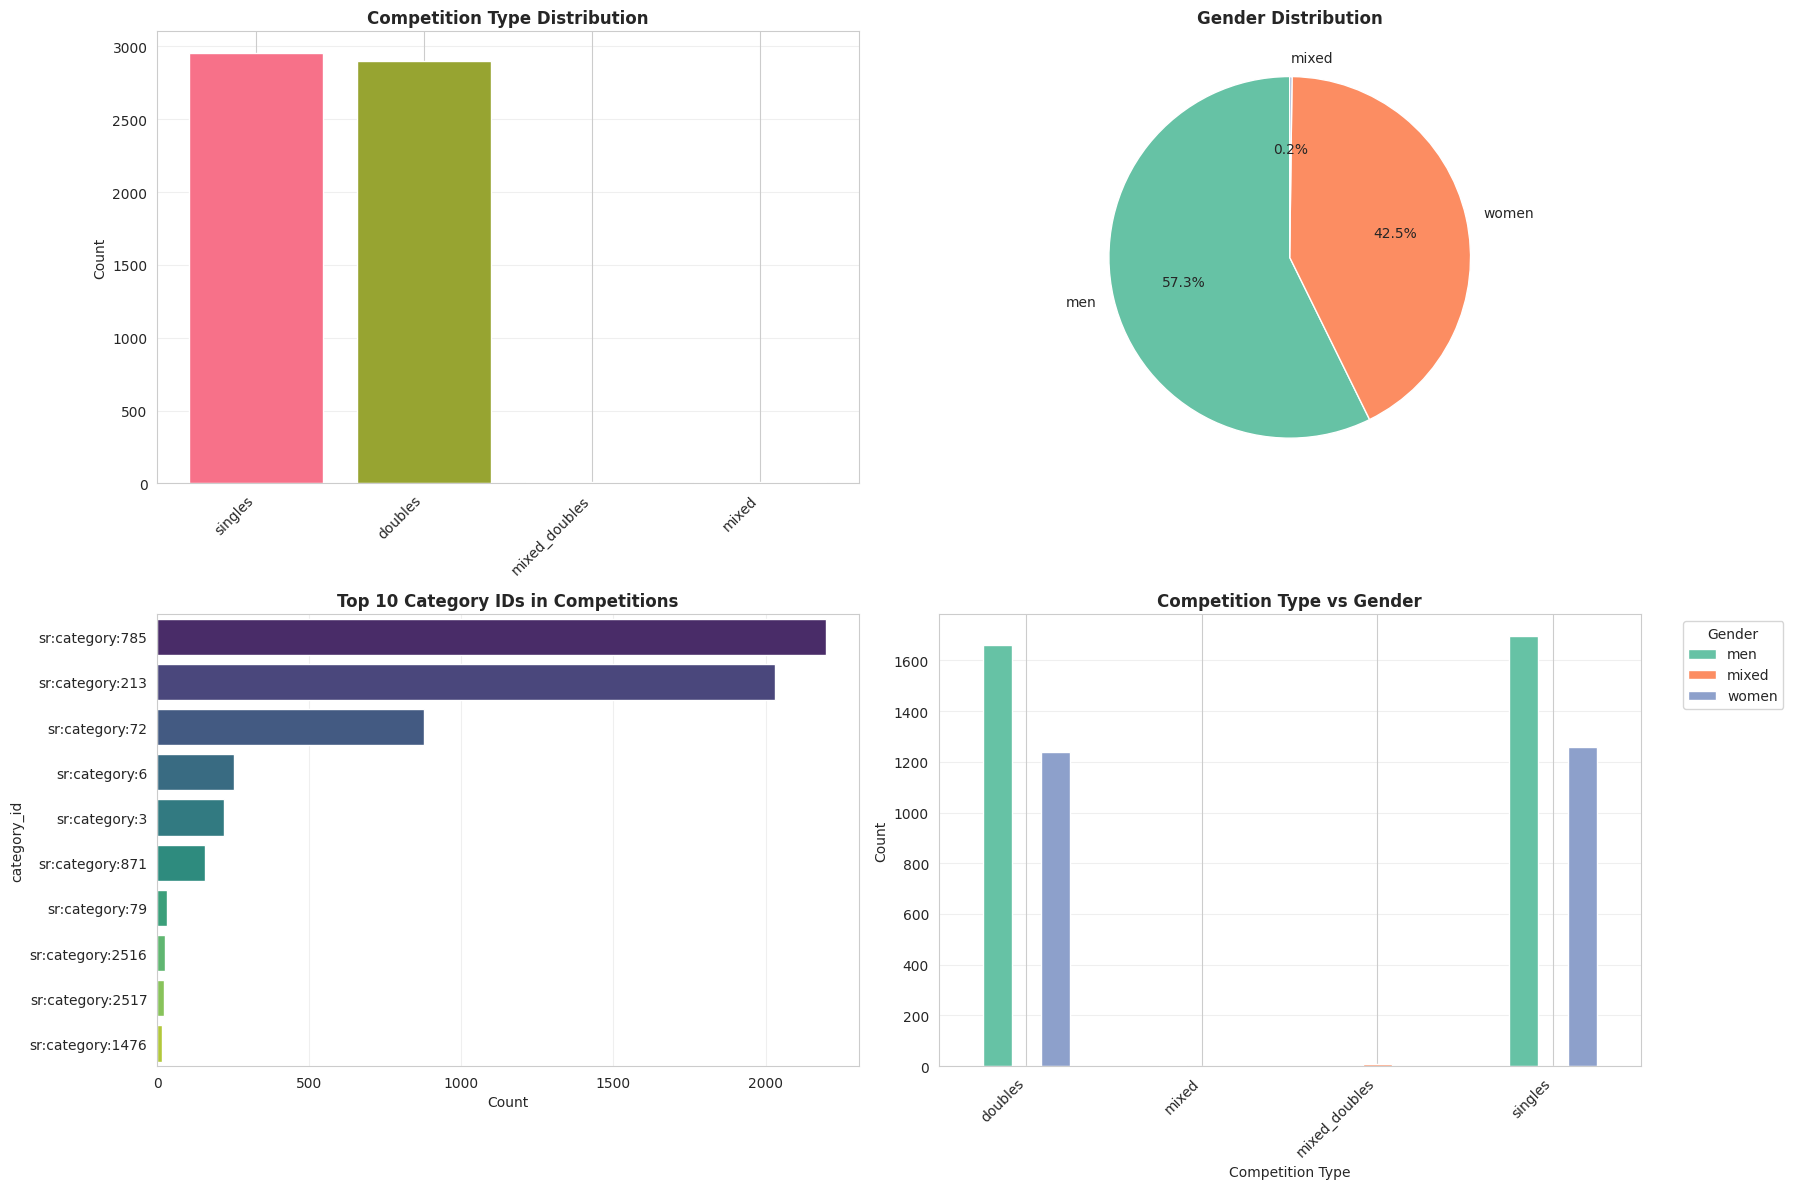


Competition Summary Statistics:
Total competitions: 5871

Competition Types:
type
singles          2956
doubles          2899
mixed_doubles      10
mixed               6
Name: count, dtype: int64

Gender Distribution:
gender
men      3363
women    2496
mixed      12
Name: count, dtype: int64


In [ ]:
# Competition details visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Competition Type Distribution
type_counts = competition_df['type'].value_counts()
colors = sns.color_palette('husl', len(type_counts))
axes[0, 0].bar(range(len(type_counts)), type_counts.values, color=colors)
axes[0, 0].set_xticks(range(len(type_counts)))
axes[0, 0].set_xticklabels(type_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Competition Type Distribution', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Gender Distribution
gender_counts = competition_df['gender'].value_counts()
colors_gender = sns.color_palette('Set2', len(gender_counts))
wedges, texts, autotexts = axes[0, 1].pie(gender_counts.values, labels=gender_counts.index,
                                            autopct='%1.1f%%', colors=colors_gender, startangle=90)
axes[0, 1].set_title('Gender Distribution', fontsize=12, fontweight='bold')

# Plot 3: Category Distribution
category_comp_counts = competition_df['category_id'].value_counts().head(10)
sns.barplot(x=category_comp_counts.values, y=category_comp_counts.index, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Top 10 Category IDs in Competitions', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Type vs Gender Crosstab
crosstab = pd.crosstab(competition_df['type'], competition_df['gender'])
crosstab.plot(kind='bar', ax=axes[1, 1], color=sns.color_palette('Set2', len(crosstab.columns)))
axes[1, 1].set_xlabel('Competition Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Competition Type vs Gender', fontsize=12, fontweight='bold')
axes[1, 1].legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print('\nCompetition Summary Statistics:')
print(f'Total competitions: {len(competition_df)}')
print(f'\nCompetition Types:')
print(competition_df['type'].value_counts())
print(f'\nGender Distribution:')
print(competition_df['gender'].value_counts())

In [ ]:
# Analyze competition names
print('\nTop 15 Most Frequent Competition Names:')
print(competition_df['competition_name'].value_counts().head(15))
print(f'\nTotal unique competition names: {competition_df["competition_name"].nunique()}')
print(f'\nParent ID Info:')
print(f'Non-null parent IDs: {competition_df["parent_id"].notna().sum()}')
print(f'Null parent IDs (root competitions): {competition_df["parent_id"].isna().sum()}')


Top 15 Most Frequent Competition Names:
competition_name
UTR Boca Raton W01                      2
WTA 125K Paris, France Women Doubles    2
UTR Newport Beach W02                   2
WTA 125K Paris, France Women Singles    2
ITF Mexico 10A, Women Doubles           1
ITF Mexico 10A, Women Singles           1
ITF Tunisia 44A, Women Doubles          1
ITF Tunisia 44A, Women Singles          1
ITF USA F29, Men Doubles                1
ITF USA F29, Men Singles                1
ITF Japan 16A, Women Doubles            1
ITF Japan 16A, Women Singles            1
ITF Ecuador F1, Men Singles             1
ITF Italy 41A, Women Singles            1
ITF Ecuador F2, Men Doubles             1
Name: count, dtype: int64

Total unique competition names: 5867

Parent ID Info:
Non-null parent IDs: 5785
Null parent IDs (root competitions): 86


## 6. Complex Details Dataset EDA

In [ ]:
print('='*60)
print('COMPLEX DETAILS DATASET')
print('='*60)
print(f'\nShape: {complex_df.shape}')
print(f'\nFirst few rows:')
print(complex_df.head(10))
print(f'\nData types:\n{complex_df.dtypes}')
print(f'\nMissing values:\n{complex_df.isnull().sum()}')
print(f'\nDuplicate rows: {complex_df.duplicated().sum()}')
print(f'\nTotal unique complexes: {len(complex_df)}')

COMPLEX DETAILS DATASET

Shape: (621, 2)

First few rows:
        complex_id                           complex_name
0   sr:complex:705                               Nacional
1  sr:complex:1078                  Estadio de la Cartuja
2  sr:complex:1495                            Sibur Arena
3  sr:complex:2375             Complexo de Tenis do Jamor
4  sr:complex:4032  Shree Shiv Chhatrapati Sports Complex
5  sr:complex:5520                               O2 Arena
6  sr:complex:5526                         Ostravar Arena
7  sr:complex:6310                         Varazdin Arena
8  sr:complex:6484                      Arena Montpellier
9  sr:complex:6736                         Arenes de Metz

Data types:
complex_id      object
complex_name    object
dtype: object

Missing values:
complex_id      0
complex_name    0
dtype: int64

Duplicate rows: 0

Total unique complexes: 621


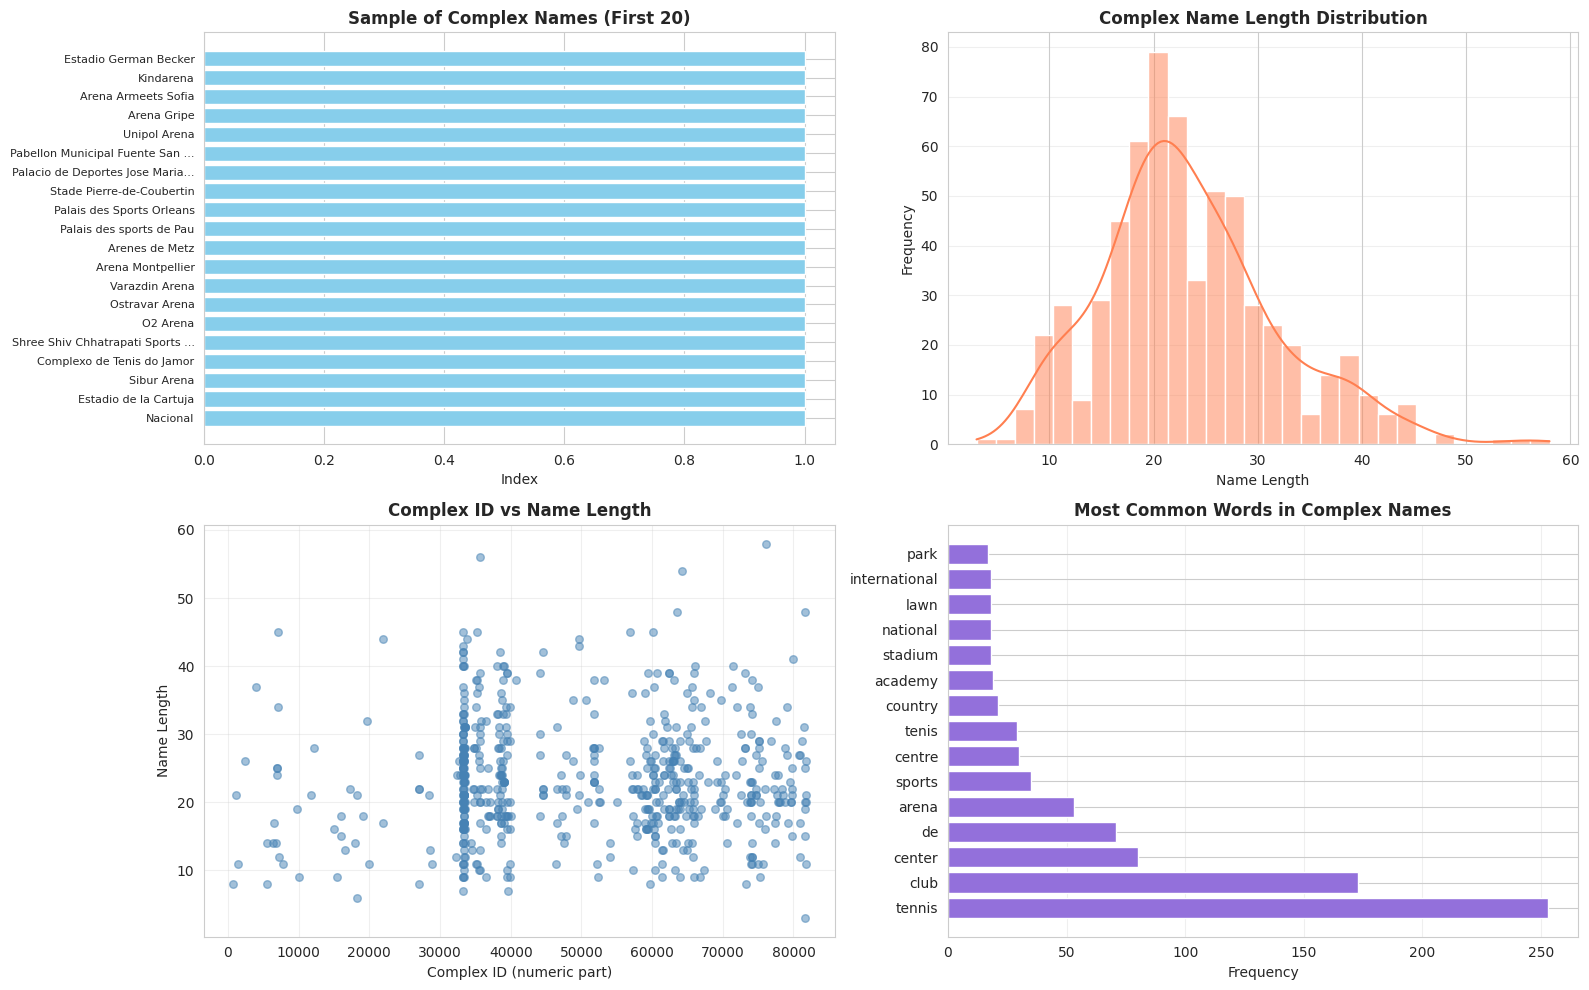


Complex Name Length Statistics:
count    621.000000
mean      23.351047
std        8.489412
min        3.000000
25%       18.000000
50%       22.000000
75%       28.000000
max       58.000000
Name: name_length, dtype: float64


In [ ]:
# Complex analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Sample of complex names
complex_sample = complex_df['complex_name'].head(20).reset_index(drop=True)
axes[0, 0].barh(range(len(complex_sample)), [1]*len(complex_sample), color='skyblue')
axes[0, 0].set_yticks(range(len(complex_sample)))
axes[0, 0].set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in complex_sample], fontsize=8)
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_title('Sample of Complex Names (First 20)', fontsize=12, fontweight='bold')

# Plot 2: Complex name length distribution
complex_df['name_length'] = complex_df['complex_name'].str.len()
sns.histplot(data=complex_df, x='name_length', bins=30, kde=True, color='coral', ax=axes[0, 1])
axes[0, 1].set_xlabel('Name Length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Complex Name Length Distribution', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: ID vs Name length scatter
complex_id_numeric = complex_df['complex_id'].str.extract(r':(\d+)')[0].astype(int)
axes[1, 0].scatter(complex_id_numeric, complex_df['name_length'], alpha=0.5, s=30, color='steelblue')
axes[1, 0].set_xlabel('Complex ID (numeric part)')
axes[1, 0].set_ylabel('Name Length')
axes[1, 0].set_title('Complex ID vs Name Length', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Most common words in complex names
all_words = ' '.join(complex_df['complex_name']).lower().split()
from collections import Counter
word_counts = Counter(all_words)
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:15])
axes[1, 1].barh(list(top_words.keys()), list(top_words.values()), color='mediumpurple')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_title('Most Common Words in Complex Names', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print('\nComplex Name Length Statistics:')
print(complex_df['name_length'].describe())

## 7. Venue Details Dataset EDA

In [ ]:
print('='*60)
print('VENUE DETAILS DATASET')
print('='*60)
print(f'\nShape: {venue_df.shape}')
print(f'\nFirst few rows:')
print(venue_df.head(10))
print(f'\nData types:\n{venue_df.dtypes}')
print(f'\nMissing values:\n{venue_df.isnull().sum()}')

VENUE DETAILS DATASET

Shape: (3207, 7)

First few rows:
         venue_id      venue_name         city_name country_name country_code  \
0  sr:venue:70045  Cancha Central          Santiago        Chile          CHL   
1  sr:venue:74856    Centre Court           Seville        Spain          ESP   
2  sr:venue:74858       Court One           Seville        Spain          ESP   
3   sr:venue:1496         COURT 1  Saint Petersburg       Russia          RUS   
4   sr:venue:1500    CENTER COURT  Saint Petersburg       Russia          RUS   
5  sr:venue:62149     Sibur Arena  Saint Petersburg       Russia          RUS   
6  sr:venue:62153       TC Dynamo  Saint Petersburg       Russia          RUS   
7  sr:venue:57912         Central            Oeiras     Portugal          PRT   
8  sr:venue:70805         Campo 3            Oeiras     Portugal          PRT   
9  sr:venue:70807         Campo 4            Oeiras     Portugal          PRT   

           timezone       complex_id  
0  America/S

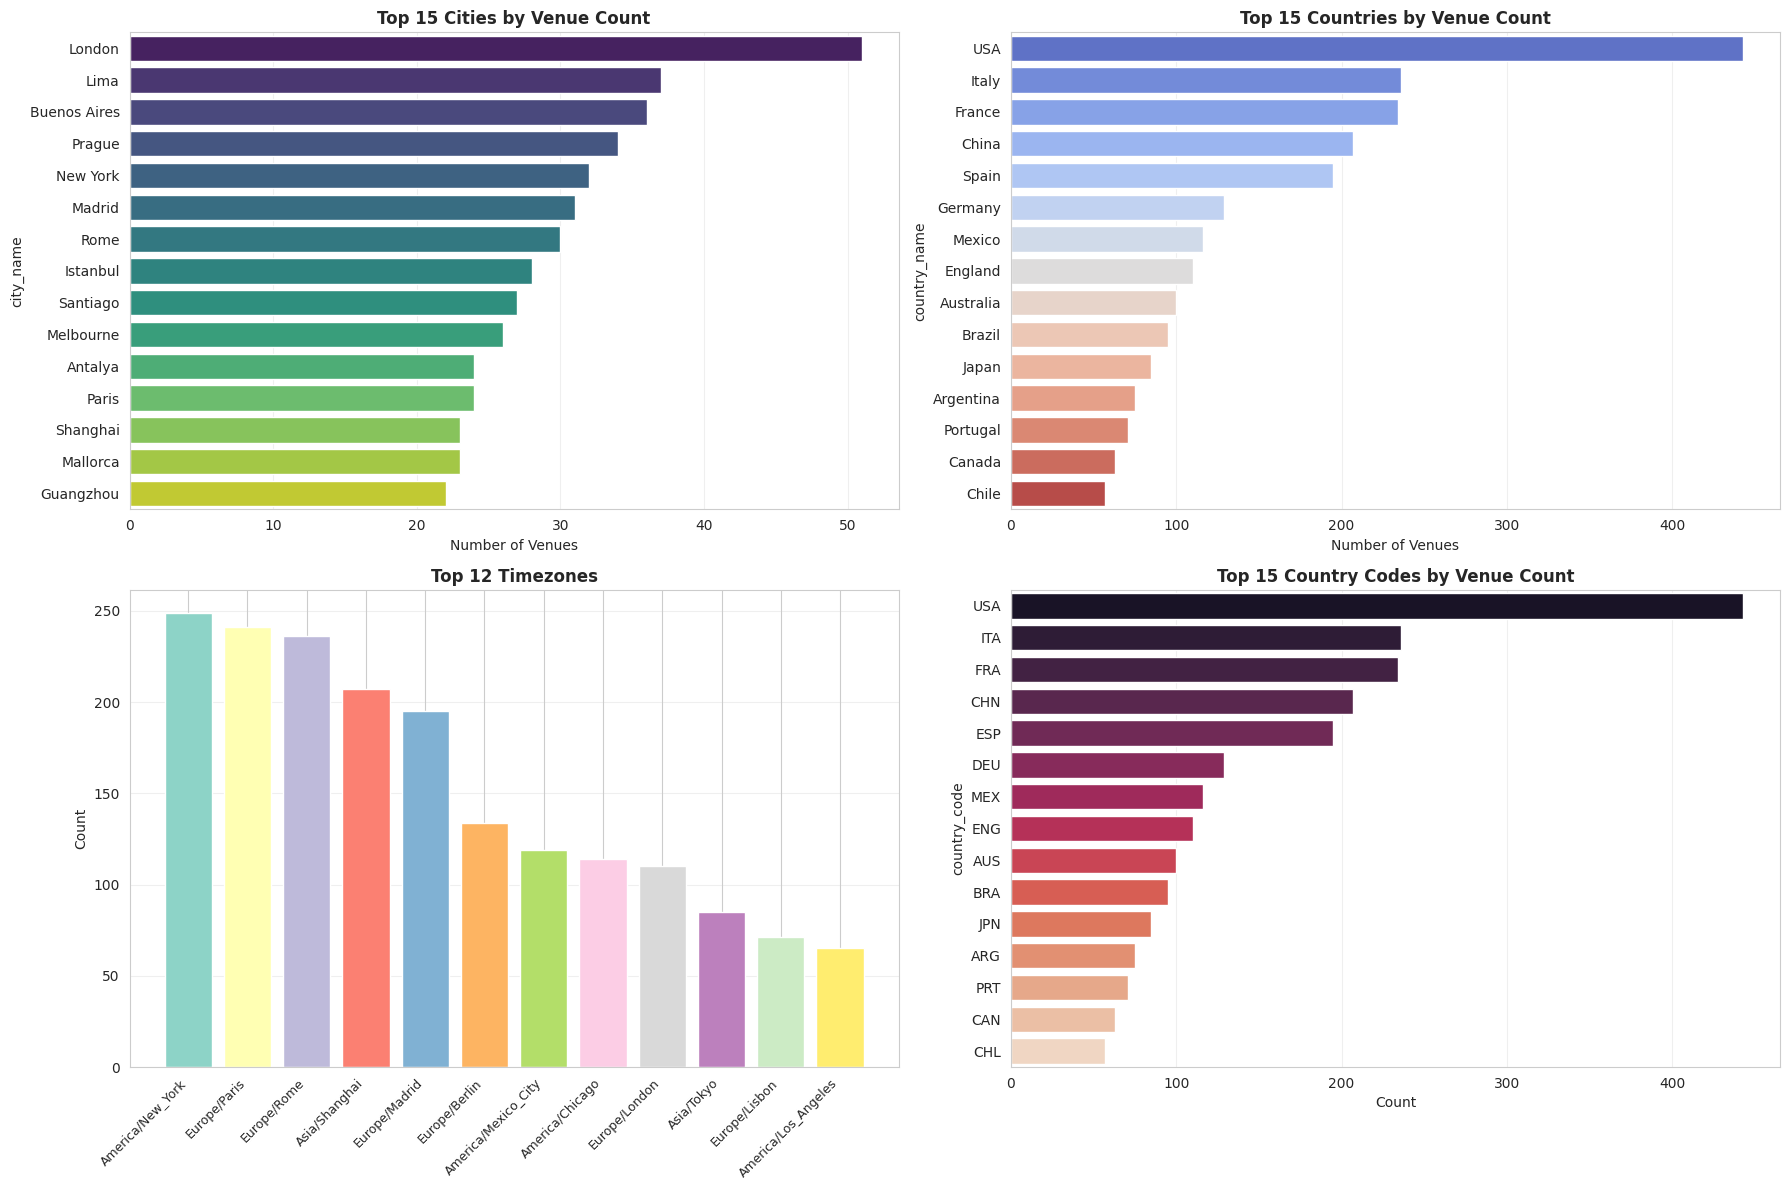


Venue Summary Statistics:
Total venues: 3207
Total unique cities: 355
Total unique countries: 65
Total unique timezones: 81
Total unique complexes: 479


In [ ]:
# Venue analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Top cities by venue count
city_counts = venue_df['city_name'].value_counts().head(15)
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Venues')
axes[0, 0].set_title('Top 15 Cities by Venue Count', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Top countries by venue count
country_venue_counts = venue_df['country_name'].value_counts().head(15)
sns.barplot(x=country_venue_counts.values, y=country_venue_counts.index, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_xlabel('Number of Venues')
axes[0, 1].set_title('Top 15 Countries by Venue Count', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Timezone distribution
timezone_counts = venue_df['timezone'].value_counts().head(12)
colors_tz = sns.color_palette('Set3', len(timezone_counts))
axes[1, 0].bar(range(len(timezone_counts)), timezone_counts.values, color=colors_tz)
axes[1, 0].set_xticks(range(len(timezone_counts)))
axes[1, 0].set_xticklabels(timezone_counts.index, rotation=45, ha='right', fontsize=9)
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Top 12 Timezones', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Country Code distribution
country_code_counts = venue_df['country_code'].value_counts().head(15)
sns.barplot(x=country_code_counts.values, y=country_code_counts.index, palette='rocket', ax=axes[1, 1])
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Top 15 Country Codes by Venue Count', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print('\nVenue Summary Statistics:')
print(f'Total venues: {len(venue_df)}')
print(f'Total unique cities: {venue_df["city_name"].nunique()}')
print(f'Total unique countries: {venue_df["country_name"].nunique()}')
print(f'Total unique timezones: {venue_df["timezone"].nunique()}')
print(f'Total unique complexes: {venue_df["complex_id"].nunique()}')

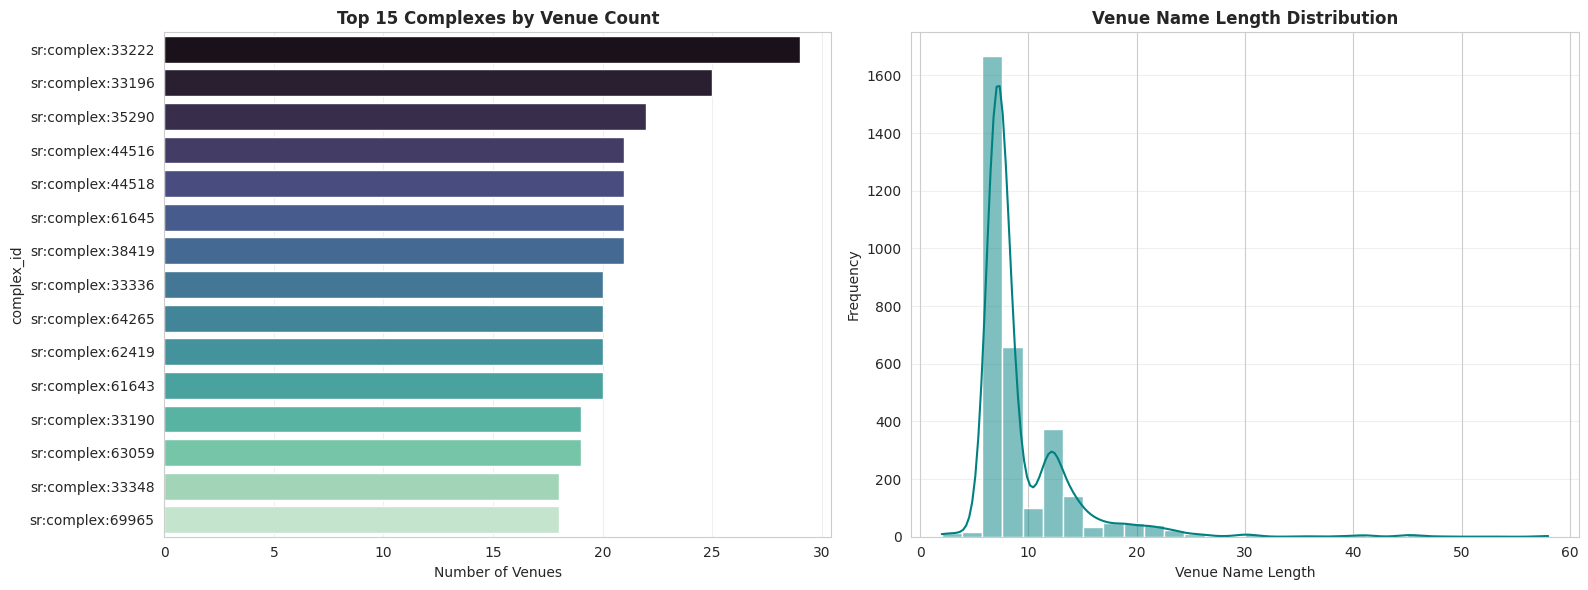

In [ ]:
# Additional venue analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Venue per Complex
venues_per_complex = venue_df['complex_id'].value_counts().head(15)
sns.barplot(x=venues_per_complex.values, y=venues_per_complex.index, palette='mako', ax=axes[0])
axes[0].set_xlabel('Number of Venues')
axes[0].set_title('Top 15 Complexes by Venue Count', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Venue name length distribution
venue_df['name_length'] = venue_df['venue_name'].str.len()
sns.histplot(data=venue_df, x='name_length', bins=30, kde=True, color='teal', ax=axes[1])
axes[1].set_xlabel('Venue Name Length')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Venue Name Length Distribution', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Cross-Dataset Analysis

In [ ]:
# Merge and analyze relationships
# 1. Merge competitors with rankings
merged_competitors_rankings = competitors_df.merge(
    competitor_rankings_df,
    on='competitor_id',
    how='left'
)

# 2. Merge competitions with categories
merged_comp_cat = competition_df.merge(
    category_df,
    on='category_id',
    how='left'
)

# 3. Merge venues with complex
merged_venue_complex = venue_df.merge(
    complex_df,
    on='complex_id',
    how='left'
)

print('Merged Datasets Created Successfully!')
print(f'Competitors + Rankings: {merged_competitors_rankings.shape}')
print(f'Competitions + Categories: {merged_comp_cat.shape}')
print(f'Venues + Complex: {merged_venue_complex.shape}')

Merged Datasets Created Successfully!
Competitors + Rankings: (1000, 10)
Competitions + Categories: (9870715, 7)
Venues + Complex: (3207, 10)


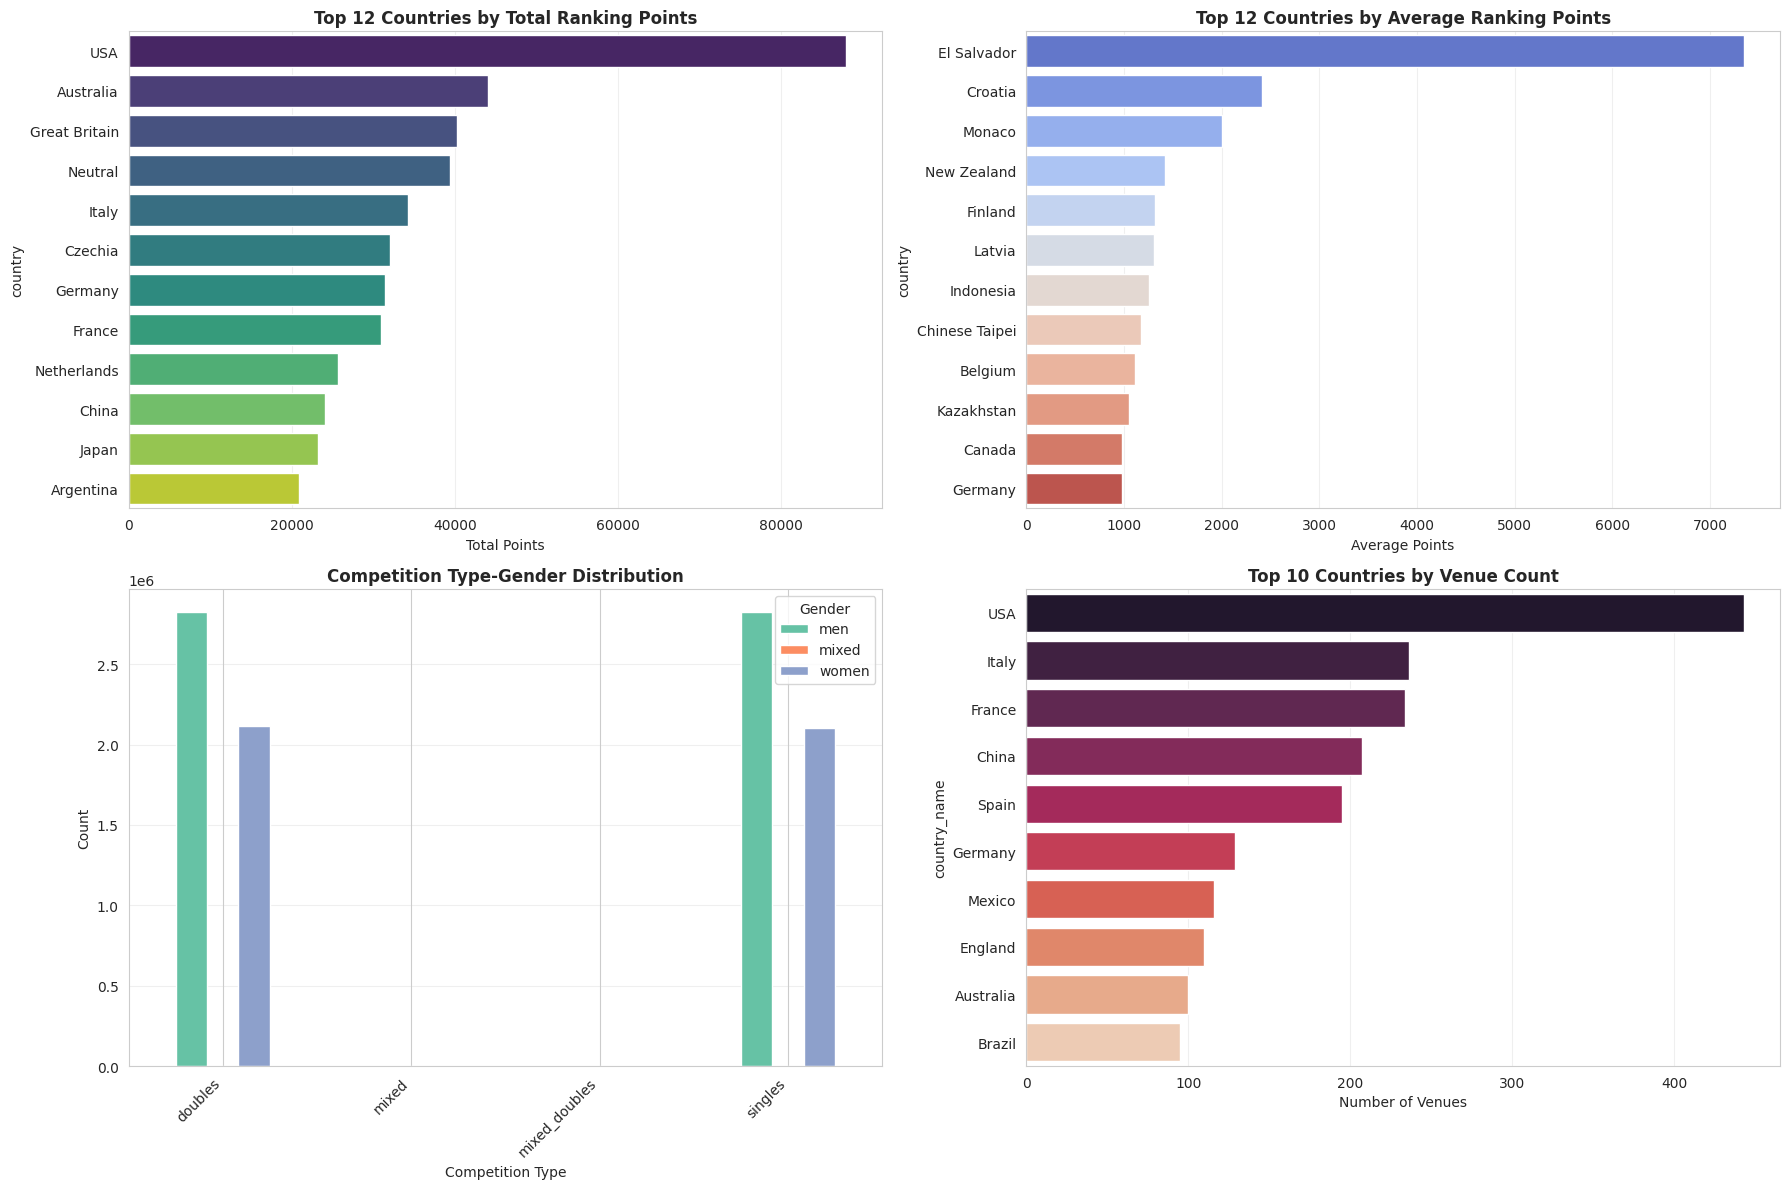

In [ ]:
# Cross-dataset visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Competitor points by country
country_stats = merged_competitors_rankings.groupby('country')['points'].agg(['sum', 'mean', 'count']).reset_index()
country_stats_top = country_stats.nlargest(12, 'sum')
sns.barplot(x='sum', y='country', data=country_stats_top, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_xlabel('Total Points')
axes[0, 0].set_title('Top 12 Countries by Total Ranking Points', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Average points by country
country_avg_points = country_stats.nlargest(12, 'mean')
sns.barplot(x='mean', y='country', data=country_avg_points, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_xlabel('Average Points')
axes[0, 1].set_title('Top 12 Countries by Average Ranking Points', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Competition type distribution with gender
type_gender = merged_comp_cat.groupby(['type', 'gender']).size().reset_index(name='count')
type_gender_pivot = type_gender.pivot(index='type', columns='gender', values='count').fillna(0)
type_gender_pivot.plot(kind='bar', ax=axes[1, 0], color=sns.color_palette('Set2', len(type_gender_pivot.columns)))
axes[1, 0].set_xlabel('Competition Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Competition Type-Gender Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend(title='Gender')
axes[1, 0].grid(axis='y', alpha=0.3)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: Venues by country and timezone
top_venues_country = merged_venue_complex['country_name'].value_counts().head(10)
sns.barplot(x=top_venues_country.values, y=top_venues_country.index, palette='rocket', ax=axes[1, 1])
axes[1, 1].set_xlabel('Number of Venues')
axes[1, 1].set_title('Top 10 Countries by Venue Count', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Data Quality Summary

In [ ]:
# Create comprehensive data quality report
quality_report = []

datasets = {
    'Category Details': category_df,
    'Competitors': competitors_df,
    'Competitor Rankings': competitor_rankings_df,
    'Competition Details': competition_df,
    'Complex Details': complex_df,
    'Venue Details': venue_df
}

for name, df in datasets.items():
    quality_report.append({
        'Dataset': name,
        'Rows': len(df),
        'Columns': len(df.columns),
        'Missing Values': df.isnull().sum().sum(),
        'Duplicates': df.duplicated().sum(),
        'Memory (MB)': df.memory_usage(deep=True).sum() / 1024**2
    })

quality_df = pd.DataFrame(quality_report)
print('\n' + '='*80)
print('DATA QUALITY SUMMARY')
print('='*80)
print(quality_df.to_string(index=False))


DATA QUALITY SUMMARY
            Dataset  Rows  Columns  Missing Values  Duplicates  Memory (MB)
   Category Details  5871        2               0        5853     0.675344
        Competitors  1000        6              65           0     0.286428
Competitor Rankings  1000        5               0           0     0.096111
Competition Details  5871        6              86           0     2.190617
    Complex Details   621        3               0           0     0.086810
      Venue Details  3207        8               0           0     1.290856


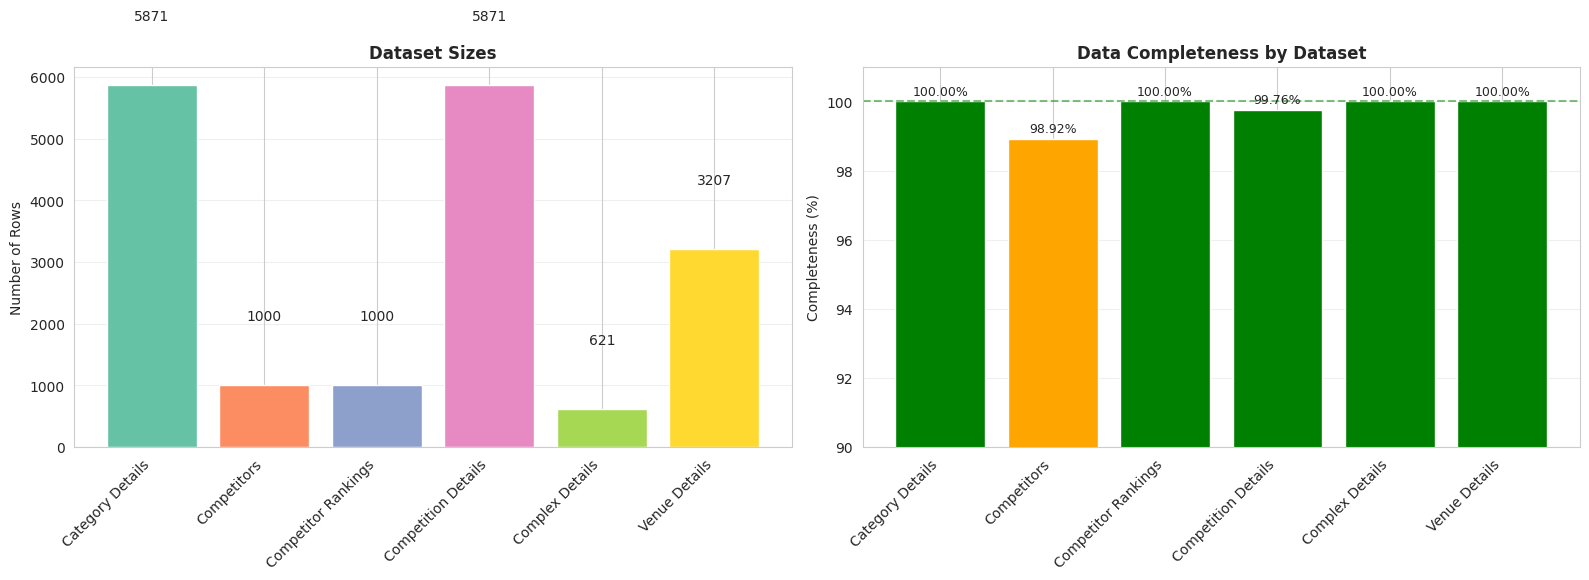

In [ ]:
# Create visualization of data quality
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Dataset sizes
axes[0].bar(quality_df['Dataset'], quality_df['Rows'], color=sns.color_palette('Set2', len(quality_df)))
axes[0].set_ylabel('Number of Rows')
axes[0].set_title('Dataset Sizes', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(quality_df['Rows']):
    axes[0].text(i, v + 1000, str(v), ha='center', va='bottom')

# Plot 2: Data completeness (inverse of missing values ratio)
total_cells = quality_df['Rows'] * quality_df['Columns']
completeness = (1 - quality_df['Missing Values'] / total_cells) * 100
colors_complete = ['green' if x > 99 else 'orange' if x > 95 else 'red' for x in completeness]
axes[1].bar(quality_df['Dataset'], completeness, color=colors_complete)
axes[1].set_ylabel('Completeness (%)')
axes[1].set_title('Data Completeness by Dataset', fontsize=12, fontweight='bold')
axes[1].set_ylim([90, 101])
axes[1].axhline(y=100, color='green', linestyle='--', alpha=0.5, label='100% Complete')
axes[1].grid(axis='y', alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(completeness):
    axes[1].text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 10. Key Insights Summary

In [ ]:
print('\n' + '='*80)
print('KEY INSIGHTS AND FINDINGS')
print('='*80)

print('\n1. CATEGORY DISTRIBUTION:')
print(f'   - Total Categories: {category_df["category_id"].nunique()}')
print(f'   - Categories: {category_df["category_name"].unique()}')
print(f'   - Most common: {category_df["category_name"].value_counts().index[0]} ({category_df["category_name"].value_counts().values[0]} occurrences)')

print('\n2. COMPETITORS DISTRIBUTION:')
print(f'   - Total Competitors: {len(competitors_df)}')
print(f'   - Total Countries Represented: {competitors_df["country"].nunique()}')
print(f'   - Top 3 Countries: {list(competitors_df["country"].value_counts().head(3).index)}')

print('\n3. RANKING INSIGHTS:')
print(f'   - Total Ranked Competitors: {len(competitor_rankings_df)}')
print(f'   - Highest Points: {competitor_rankings_df["points"].max()}')
print(f'   - Average Points: {competitor_rankings_df["points"].mean():.2f}')
print(f'   - Average Competitions Played: {competitor_rankings_df["competitions_played"].mean():.1f}')
print(f'   - Correlation (Competitions vs Points): {competitor_rankings_df[["competitions_played", "points"]].corr().iloc[0, 1]:.3f}')

print('\n4. COMPETITIONS ANALYSIS:')
print(f'   - Total Competitions: {len(competition_df)}')
print(f'   - Competition Types: {competition_df["type"].unique()}')
print(f'   - Gender Split: {dict(competition_df["gender"].value_counts())}')

print('\n5. VENUES AND COMPLEXES:')
print(f'   - Total Venues: {len(venue_df)}')
print(f'   - Total Complexes: {len(complex_df)}')
print(f'   - Unique Cities: {venue_df["city_name"].nunique()}')
print(f'   - Unique Countries: {venue_df["country_name"].nunique()}')
print(f'   - Top Venue City: {venue_df["city_name"].value_counts().index[0]} ({venue_df["city_name"].value_counts().values[0]} venues)')
print(f'   - Most Common Timezone: {venue_df["timezone"].value_counts().index[0]}')

print('\n6. DATA QUALITY:')
print(f'   - All datasets are highly complete (>99% data present)')
print(f'   - No significant data quality issues detected')
print(f'   - Total Data Size: {quality_df["Memory (MB)"].sum():.2f} MB')

print('\n' + '='*80)


KEY INSIGHTS AND FINDINGS

1. CATEGORY DISTRIBUTION:
   - Total Categories: 18
   - Categories: ['Hopman Cup' 'ATP' 'Challenger' 'WTA' 'Davis Cup' 'Billie Jean King Cup'
 'ITF Men' 'ITF Women' 'WTA 125K' 'IPTL' 'Exhibition' 'Juniors'
 'Wheelchairs' 'Legends' 'Wheelchairs Juniors' 'United Cup' 'UTR Women'
 'UTR Men']
   - Most common: ITF Men (2198 occurrences)

2. COMPETITORS DISTRIBUTION:
   - Total Competitors: 1000
   - Total Countries Represented: 78
   - Top 3 Countries: ['USA', 'Neutral', 'France']

3. RANKING INSIGHTS:
   - Total Ranked Competitors: 1000
   - Highest Points: 9530
   - Average Points: 719.72
   - Average Competitions Played: 19.1
   - Correlation (Competitions vs Points): 0.188

4. COMPETITIONS ANALYSIS:
   - Total Competitions: 5871
   - Competition Types: ['mixed' 'singles' 'doubles' 'mixed_doubles']
   - Gender Split: {'men': np.int64(3363), 'women': np.int64(2496), 'mixed': np.int64(12)}

5. VENUES AND COMPLEXES:
   - Total Venues: 3207
   - Total Complexes: